# Titanic Survival Prediction - Kaggle Competition


## 1. Project Overview
- **Competition Goal**: Predict survival on the Titanic
- **Target Variable**: Survived (0 = No, 1 = Yes)
- **Problem Type**: Binary Classification
- **Evaluation Metric**: Accuracy

## 2. Import Libraries
- **Data Manipulation**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Warnings**: warnings

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.metrics import (
    mean_absolute_error as MAE, 
    mean_squared_error as MSE, 
    classification_report, 
    confusion_matrix, 
    accuracy_score
)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV

import warnings
from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings('ignore', category=DataConversionWarning)
pd.set_option('mode.chained_assignment', None)


## 3. Data Loading
- **Load Training Data**
- **Load Test Data**
- **Display Basic Information**

In [122]:
titanic_train = pd.read_csv('data/train.csv')
titanic_test = pd.read_csv('data/test.csv')
titanic_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Overview
- **Dataset Shape**
- **Data Types**
- **Missing Values**
- **Basic Statistics**

In [123]:
titanic_train.shape, titanic_test.shape

((891, 12), (418, 11))

In [124]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
missing_values_train = titanic_train.isnull().sum().sort_values(ascending=False) / len(titanic_train) * 100
missing_values_train[missing_values_train > 0]

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

In [126]:
missing_values_test = titanic_test.isnull().sum().sort_values(ascending=False) / len(titanic_test) * 100
missing_values_test[missing_values_test > 0]

Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64

In [127]:
titanic_train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 4.2 Target Variable Analysis
- **Target Distribution**

<Axes: xlabel='Survived', ylabel='count'>

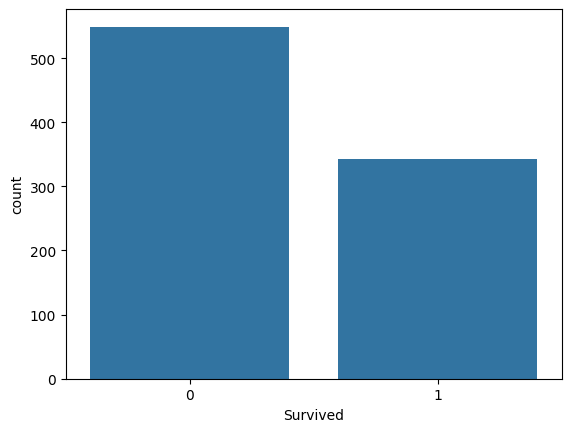

In [128]:
sns.countplot(x='Survived', data=titanic_train)

### 4.3 Feature Analysis

#### **Numerical Features**
  - Age distribution
  - Pclass distribution
  - Fare distribution
  - SibSp and Parch analysis


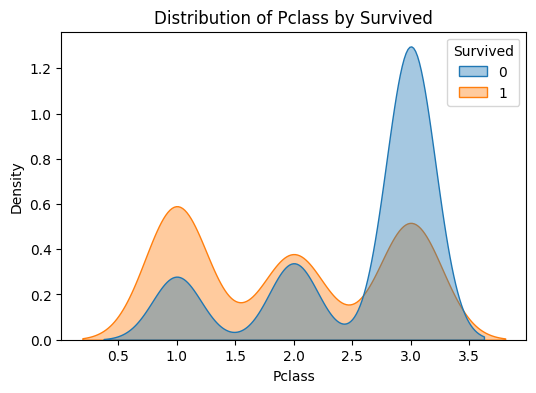

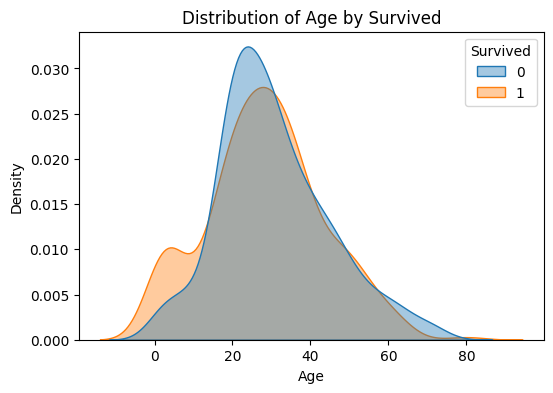

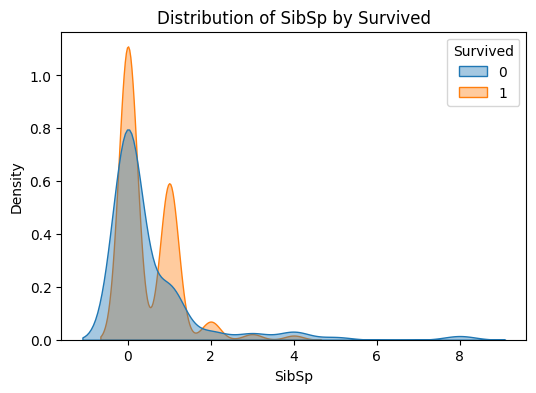

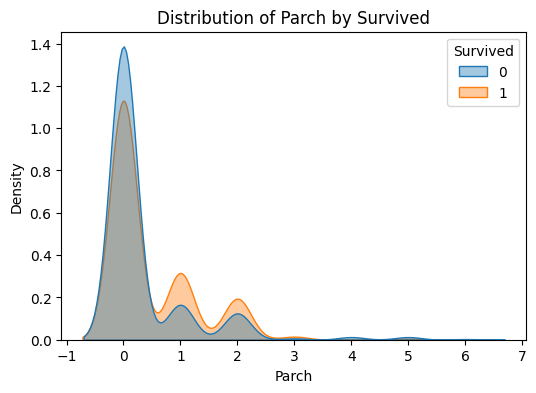

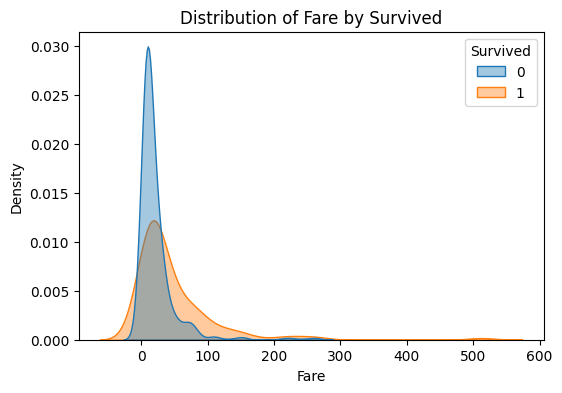

In [129]:
numeric_features = titanic_train.drop(["Survived", 'PassengerId'], axis=1).select_dtypes(include='number').columns.tolist()
target = 'Survived'

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=titanic_train, x=feature, hue=target, common_norm=False, fill=True, alpha=0.4)
    plt.title(f'Distribution of {feature} by {target}')
    plt.show()


##### Pclass - погибшие в основном — из 3-го класса, а выжившие — из 1-го и 2-го. Можно сгенерировать is_not_3_Class
##### Age - дети до 10 лет имели хоршую выживаемость, генерируем новый признак is_child = Age <= 10
##### SibSp - люди без родственников на борту или неболее 2 имели высокие шансы, также можно сделать бинарный признак по границе 2
##### Parch - хорошая выживаемость от 1 до 2 включительно
##### Fare - люди купившие билет за более высокую цену чаше выживали, генерируем бинарный признак от 60 доларов и выше

#### **Categorical Features**
  - Sex analysis
  - Embarked analysis

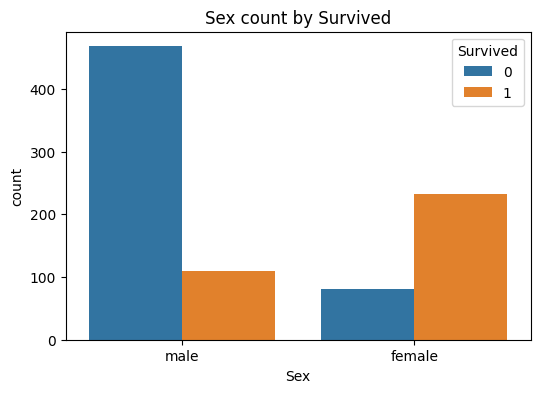

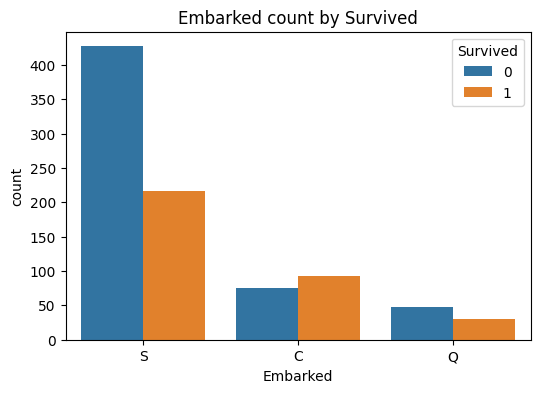

In [130]:
categorical_features = titanic_train.drop(["Name", 'Ticket', 'Cabin'], axis=1).select_dtypes(include='object').columns.tolist()
target = 'Survived'

for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=titanic_train, x=feature, hue=target)
    plt.title(f'{feature} count by {target}')
    plt.show()

##### Sex - женщины имели большой шанс на выживание
##### Embarked - люди севшие в порту C имели большой шанс выжить, проверим, а не связано ли место посадки с классом билета 

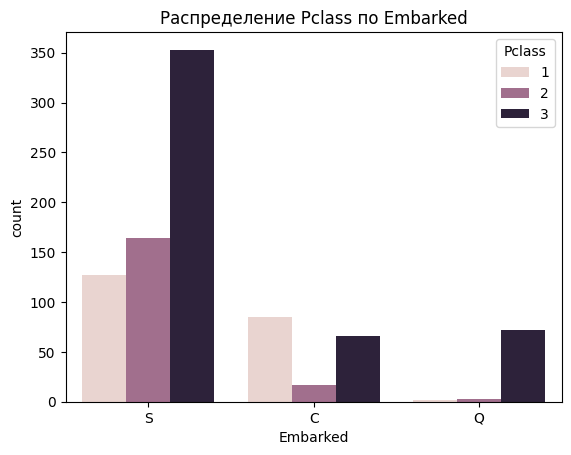

In [131]:
sns.countplot(data=titanic_train, x='Embarked', hue='Pclass')
plt.title('Распределение Pclass по Embarked')
plt.show()

##### Действительно большая часть — 1-й класс. Богатые пассажиры садились в С → это может объяснить более высокую выживаемость
##### А в порту S садилось много бедных пассажиров, что объясняет более низкую выживаемость

### 4.4 Feature Relationships
- **Correlation Analysis**

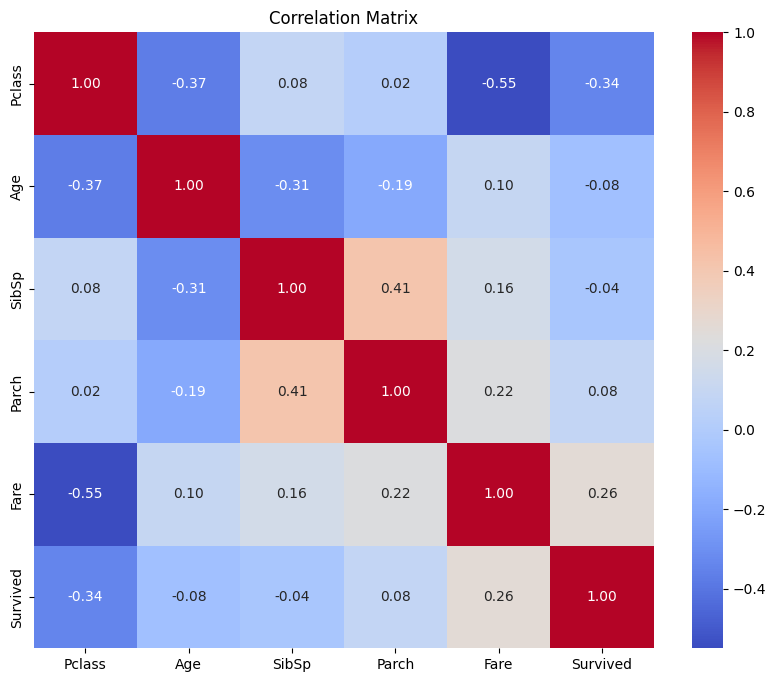

In [132]:
corr_matrix = titanic_train[numeric_features + ['Survived']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 5. Data Preprocessing


### 5.1 Missing Values Treatment

In [133]:
# Удалить Cabin
titanic_train = titanic_train.drop("Cabin", axis=1)
titanic_test = titanic_test.drop("Cabin", axis=1)

# Заполнить Age медианой
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].median())

# Удалить строки с пустым Embarked
titanic_train = titanic_train[~titanic_train['Embarked'].isna()]

# Заполнить Fare медианой
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].median())

### 5.2 Feature Engineering
- **Create New Features**
  - Family Size
  - Name Title
  - Age Groups
  - Fare Groups
- **Feature Transformations**

In [134]:
titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique().tolist()

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\gameo\AppData\Local\Temp\ipykernel_2384\3017617006.py:1: SyntaxWarning: invalid escape sequence '\.'
  titanic_train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False).unique().tolist()


['Mr',
 'Mrs',
 'Miss',
 'Master',
 'Don',
 'Rev',
 'Dr',
 'Mme',
 'Ms',
 'Major',
 'Lady',
 'Sir',
 'Mlle',
 'Col',
 'Capt',
 'Countess',
 'Jonkheer']

In [135]:
from matplotlib import axis


def new_features(df):
    df['family_size'] = df['SibSp'] + df['Parch']
    df['is_alone'] = (df['family_size'] <= 1).astype(int)
    
    df['is_child'] = (df['Age'] <= 12).astype(int)
    df['is_elderly'] = (df['Age'] > 60).astype(int)
    
    df['fare_per_person'] = df['Fare'] / (df['family_size'] + 1)
    df['fare_poor'] = (df['fare_per_person'] <= 25).astype(int)

    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
    
    title_counts = df['Title'].value_counts()
    rare_titles = title_counts[title_counts < 10].index.tolist()\
        
    df['Title'] = df['Title'].replace(rare_titles, 'Rare')

    df['Title'] = df['Title'].astype('category')

    df = df.drop(['Name', 'Ticket'], axis=1)

    return df


titanic_train_features = new_features(titanic_train)
titanic_test_features = new_features(titanic_test)
titanic_train_features.head()

<>:14: SyntaxWarning: invalid escape sequence '\.'
<>:14: SyntaxWarning: invalid escape sequence '\.'
C:\Users\gameo\AppData\Local\Temp\ipykernel_2384\2111539139.py:14: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family_size,is_alone,is_child,is_elderly,fare_per_person,fare_poor,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1,1,0,0,3.62500,1,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,1,1,0,0,35.64165,0,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,0,1,0,0,7.92500,1,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,1,1,0,0,26.55000,0,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,0,1,0,0,8.05000,1,Mr


### 5.3 Encoding Categorical Variables
- **Map Encoding**
- **One-Hot Encoding**

In [136]:
ohe = OneHotEncoder(sparse_output=False, drop='first')
ohe.fit(titanic_train_features[['Title', 'Embarked']])
titanic_train_features[ohe.get_feature_names_out()] = ohe.transform(titanic_train_features[['Title', 'Embarked']])
titanic_test_features[ohe.get_feature_names_out()] = ohe.transform(titanic_test_features[['Title', 'Embarked']])
titanic_train_features = titanic_train_features.drop(['Title', 'Embarked'], axis=1)
titanic_test_features = titanic_test_features.drop(['Title', 'Embarked'], axis=1)
titanic_train_features.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,family_size,is_alone,is_child,is_elderly,fare_per_person,fare_poor,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,7.2500,1,1,0,0,3.62500,1,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1,1,female,38.0,1,0,71.2833,1,1,0,0,35.64165,0,0.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,female,26.0,0,0,7.9250,0,1,0,0,7.92500,1,1.0,0.0,0.0,0.0,0.0,1.0


In [137]:
titanic_train_features['Sex'] = titanic_train_features['Sex'].map({'male': 0, 'female': 1})
titanic_test_features['Sex'] = titanic_test_features['Sex'].map({'male': 0, 'female': 1})

In [138]:
titanic_train_features = pd.get_dummies(titanic_train_features, columns=['Pclass'], drop_first=True)
titanic_test_features = pd.get_dummies(titanic_test_features, columns=['Pclass'], drop_first=True)

### 5.4 Data Scaling/Normalization
- **StandardScaler**

In [139]:
# Числовые фичи, требующие масштабирования
scale_features = ['Age', 'Fare', 'fare_per_person']

scaler = StandardScaler()
titanic_train_features[scale_features] = scaler.fit_transform(titanic_train_features[scale_features])
titanic_test_features[scale_features] = scaler.transform(titanic_test_features[scale_features])

## 6. Model Development

### 6.1 Data Splitting
- **Train/Validation Split**

In [140]:
X = titanic_train_features.drop(['Survived', 'PassengerId'], axis=1)
y = titanic_train_features['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 6.2 Baseline Models
- **Logistic Regression**
- **Random Forest**
- **Support Vector Machine**
- **Gradient Boosting**

In [141]:
first_models = {
    "LogReg": LogisticRegression(random_state=42, solver='lbfgs', max_iter=3000),
    "RF": RandomForestClassifier(random_state=42),
    "XGB": XGBClassifier(random_state=42),
    "Svc": SVC(random_state=42, probability=True),
    "GBC": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
}

In [142]:
scoring = ['accuracy', 'precision', 'recall', 'f1']

for name, model in first_models.items():
    scores = cross_validate(model, X_train, y_train, cv=5, scoring=scoring)
    
    print(f"{name}")
    print(f"Accuracy : {scores['test_accuracy'].mean():.3f}")
    print(f"Precision: {scores['test_precision'].mean():.3f}")
    print(f"Recall   : {scores['test_recall'].mean():.3f}")
    print(f"F1 Score : {scores['test_f1'].mean():.3f}")

LogReg
Accuracy : 0.826
Precision: 0.789
Recall   : 0.746
F1 Score : 0.765
RF
Accuracy : 0.823
Precision: 0.776
Recall   : 0.758
F1 Score : 0.765
XGB
Accuracy : 0.817
Precision: 0.780
Recall   : 0.732
F1 Score : 0.752
Svc
Accuracy : 0.830
Precision: 0.805
Recall   : 0.735
F1 Score : 0.767
GBC
Accuracy : 0.833
Precision: 0.801
Recall   : 0.750
F1 Score : 0.774
KNN
Accuracy : 0.799
Precision: 0.763
Recall   : 0.691
F1 Score : 0.724


### 6.3 Model Evaluation
- **Confusion Matrix**
- **Classification Report**
- **Cross-Validation Scores**

In [143]:
def check_proba(name, model):
    model.fit(X_train, y_train)
    best_score = 0
    best_pr = 0

    pred = model.predict_proba(X_test)[:, 1]
    for pr in np.arange(0.1, 1, 0.05):
        pred_res = [1 if i > pr else 0 for i in pred]
        score = accuracy_score(y_test, pred_res)
        if score > best_score:
            best_score = score
            best_pr = pr

    print(name, best_score, best_pr)

In [144]:
for name, model in first_models.items():
    check_proba(name, model)

LogReg 0.8202247191011236 0.40000000000000013
RF 0.8033707865168539 0.45000000000000007
XGB 0.8202247191011236 0.7000000000000002
Svc 0.8146067415730337 0.3500000000000001
GBC 0.8426966292134831 0.6500000000000001
KNN 0.7921348314606742 0.40000000000000013


## 7. Hyperparameter Tuning

### 7.1 Random Search
- **Random Parameter Sampling**

In [145]:
def evaluate_model_accuracy(model, param_dist, name, X_train, y_train, X_test, y_test, n_iter=70):
    print(f"{name} — HYPERPARAMETER TUNING (accuracy)")
    
    rsearch = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring='accuracy',
        cv=5,
        n_jobs=-1,
        random_state=42,
        verbose=0
    )
    
    rsearch.fit(X_train, y_train)
    best_model = rsearch.best_estimator_
    
    print("\nBest hyperparameters:")
    print(rsearch.best_params_)
    
    y_pred = best_model.predict(X_train)
    acc = accuracy_score(y_train, y_pred)
    print(f"Best Accuracy on train: {acc:.3f}")

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Best Accuracy on validation: {acc:.3f}")

    best_score = 0
    best_threshold = 0
    pred = best_model.predict_proba(X_test)[:, 1]
    for threshold in np.arange(0.1, 1, 0.05):
        pred_res = [1 if i > threshold else 0 for i in pred]
        score = accuracy_score(y_test, pred_res)
        if score > best_score:
            best_score = score
            best_threshold = threshold

    print(f"Best Accuracy on validation: {best_score:.3f} best threshold {best_threshold:.3f}")


    return best_model

In [146]:
params_gbc = {
    'n_estimators': np.arange(100, 601, 100),                   
    'learning_rate': np.linspace(0.01, 0.3, 10),                
    'max_depth': np.arange(3, 11),                                
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],                   
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7, 0.9],        
    'min_samples_split': [2, 5, 10],                             
    'min_samples_leaf': [1, 3, 5],                                
    'loss': ['log_loss', 'exponential'],                         
    'criterion': ['friedman_mse', 'squared_error']               
}



params_rf = {
    'n_estimators': np.arange(100, 601, 100),                    
    'max_depth': [4, 6, 8, 10, 12],                               
    'min_samples_split': [2, 5, 10],                              
    'min_samples_leaf': [1, 2, 4],                                
    'max_features': ['sqrt', 'log2', None, 0.5, 0.7],             
    'bootstrap': [True, False],                                   
    'criterion': ['gini', 'entropy', 'log_loss'],                
    'class_weight': ['balanced']                           
}

params_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': np.logspace(-4, 4, 20),                     # регуляризация
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs', 'sag'], 
    'max_iter': [100, 200, 300, 500],
    'class_weight': [None, 'balanced'],
    'l1_ratio': np.linspace(0, 1, 10)                # только для elasticnet
}



params_xgb = {
    'n_estimators': np.arange(100, 601, 100),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 11),
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.5],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
    'scale_pos_weight': [1, 2, 5],
    'booster': ['gbtree', 'gblinear', 'dart']
}



In [147]:
best_models = {}

best_models['GBC'] = evaluate_model_accuracy(
    GradientBoostingClassifier(random_state=42),
    params_gbc, 'GBC',
    X_train, y_train, X_test, y_test
)


best_models['RF'] = evaluate_model_accuracy(
    RandomForestClassifier(random_state=42),
    params_rf, 'Random Forest',
    X_train, y_train, X_test, y_test
)

best_models['LogReg'] = evaluate_model_accuracy(
    LogisticRegression(),
    params_logreg, 'LogReg',
    X_train, y_train, X_test, y_test
)

best_models['XGB'] = evaluate_model_accuracy(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    params_xgb, 'XGB',
    X_train, y_train, X_test, y_test
)

GBC — HYPERPARAMETER TUNING (accuracy)

Best hyperparameters:
{'subsample': 0.8, 'n_estimators': np.int64(100), 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 0.5, 'max_depth': np.int64(8), 'loss': 'log_loss', 'learning_rate': np.float64(0.01), 'criterion': 'squared_error'}
Best Accuracy on train: 0.918
Best Accuracy on validation: 0.826
Best Accuracy on validation: 0.831 best threshold 0.450
Random Forest — HYPERPARAMETER TUNING (accuracy)

Best hyperparameters:
{'n_estimators': np.int64(400), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.7, 'max_depth': 4, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': True}
Best Accuracy on train: 0.861
Best Accuracy on validation: 0.809
Best Accuracy on validation: 0.831 best threshold 0.700
LogReg — HYPERPARAMETER TUNING (accuracy)


c:\Users\gameo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
160 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gameo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gameo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\gameo\AppD


Best hyperparameters:
{'solver': 'sag', 'penalty': None, 'max_iter': 300, 'l1_ratio': np.float64(0.1111111111111111), 'class_weight': None, 'C': np.float64(29.763514416313132)}
Best Accuracy on train: 0.838
Best Accuracy on validation: 0.809
Best Accuracy on validation: 0.826 best threshold 0.350
XGB — HYPERPARAMETER TUNING (accuracy)

Best hyperparameters:
{'subsample': 1.0, 'scale_pos_weight': 1, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': np.int64(100), 'max_depth': np.int64(7), 'learning_rate': np.float64(0.1711111111111111), 'gamma': 0.1, 'colsample_bytree': 0.9, 'booster': 'gbtree'}
Best Accuracy on train: 0.914
Best Accuracy on validation: 0.820
Best Accuracy on validation: 0.843 best threshold 0.700


c:\Users\gameo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:29:45] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 7.3 Model Selection
- **Best Model Selection**
- **Feature Importance**


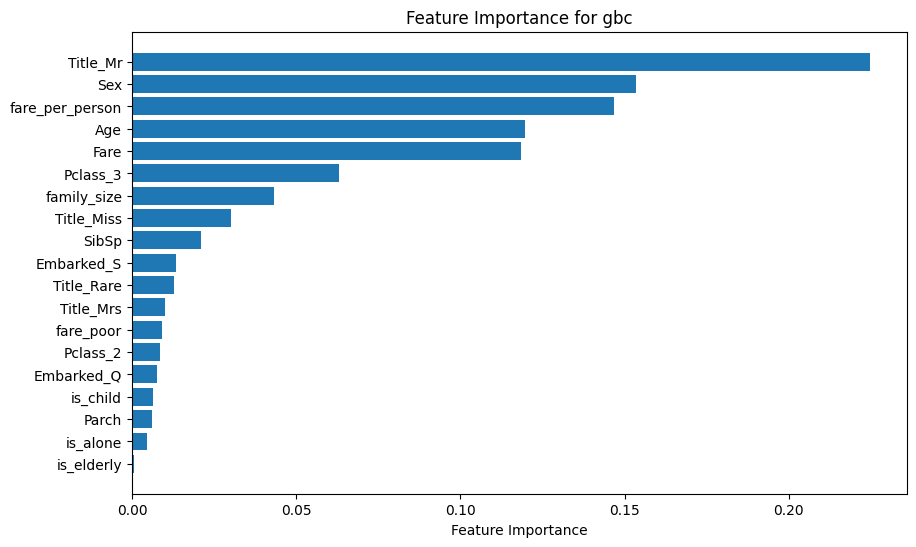

In [148]:
gbc = best_models['GBC']
importances = gbc.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title(f"Feature Importance for gbc")
plt.gca().invert_yaxis()
plt.show()

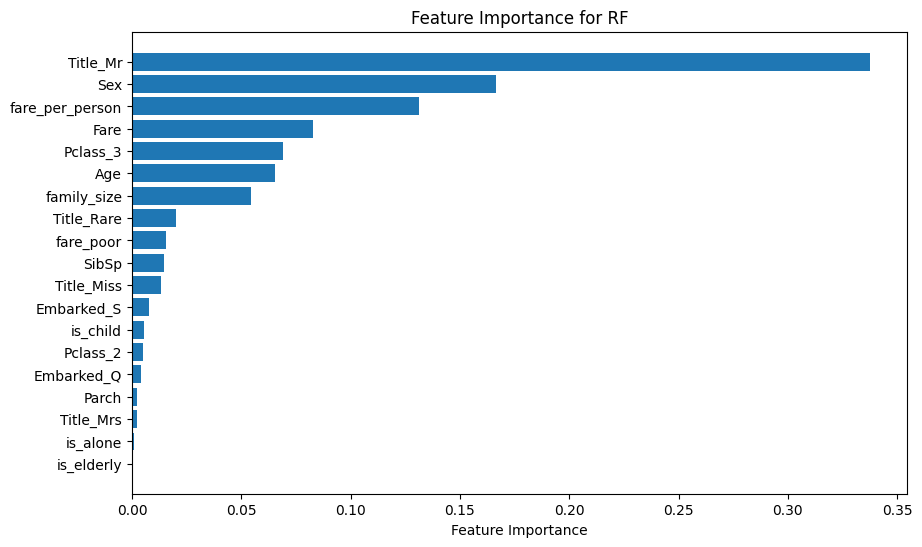

In [149]:
gbc = best_models['RF']
importances = gbc.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title(f"Feature Importance for RF")
plt.gca().invert_yaxis()
plt.show()

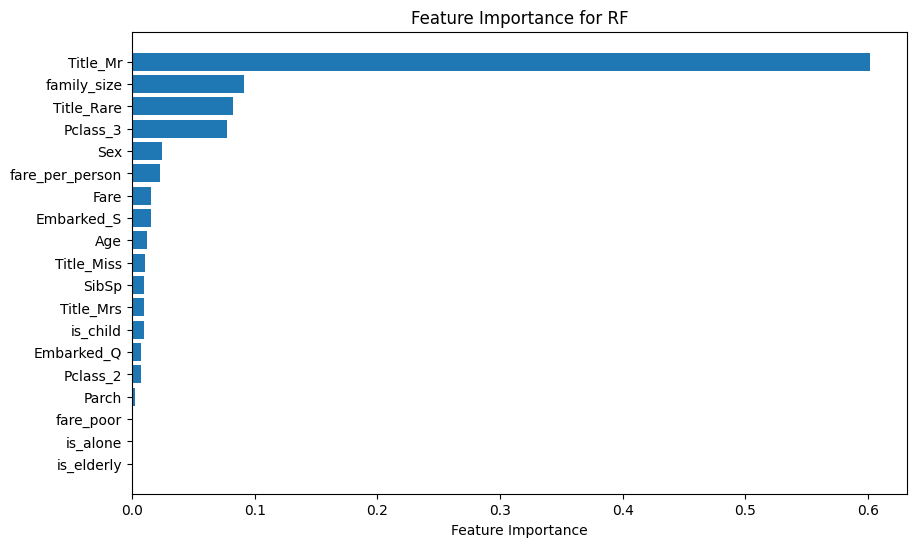

In [150]:
gbc = best_models['XGB']
importances = gbc.feature_importances_
features = X_train.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel("Feature Importance")
plt.title(f"Feature Importance for RF")
plt.gca().invert_yaxis()
plt.show()

## 8. Model Training

### 8.1 Final Model Training
- **Train on Full Dataset**

In [151]:
best_params = {
    'subsample': 0.8,
    'n_estimators': np.int64(100),
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5,
    'max_depth': np.int64(8),
    'loss': 'log_loss',
    'learning_rate': np.float64(0.01),
    'criterion': 'squared_error'}
final_model = GradientBoostingClassifier(**best_params, random_state=42)
final_model.fit(titanic_train_features.drop(["Survived", "PassengerId"], axis=1), titanic_train_features['Survived'])

,loss,'log_loss'
,learning_rate,np.float64(0.01)
,n_estimators,np.int64(100)
,subsample,0.8
,criterion,'squared_error'
,min_samples_split,5
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_depth,np.int64(8)
,min_impurity_decrease,0.0
,init,None


### 8.2 Predictions
- **Generate Predictions**
- **Submission Format**

In [152]:
y_proba = final_model.predict_proba(titanic_test_features.drop("PassengerId", axis=1))[:, 1]
y_pred_custom = (y_proba >= 0.55).astype(int)
output = pd.DataFrame({'PassengerId': titanic_test_features.PassengerId, 'Survived': y_pred_custom})
output.to_csv('submission_gbc_reg.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


##### 0.77033 - Score

## 9. Trying ensemble

In [153]:
best_params = {
    'n_estimators': np.int64(400),
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 0.7,
    'max_depth': 4,
    'criterion': 'log_loss',
    'class_weight': 'balanced',
    'bootstrap': True
}
rf_model = RandomForestClassifier(**best_params, random_state=42)

In [154]:
best_params = {
    'subsample': 0.8,
    'n_estimators': np.int64(100),
    'min_samples_split': 5,
    'min_samples_leaf': 3,
    'max_features': 0.5,
    'max_depth': np.int64(8),
    'loss': 'log_loss',
    'learning_rate': np.float64(0.01),
    'criterion': 'squared_error'}
gbc_model = GradientBoostingClassifier(**best_params, random_state=42)

In [155]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('rf', rf_model),
        ('gbc', gbc_model),
    ],
    voting='soft', 
    n_jobs=-1
)

ensemble_model.fit(
    titanic_train_features.drop(["Survived", "PassengerId"], axis=1),
    titanic_train_features["Survived"]
)


,estimators,"[('rf', ...), ('gbc', ...)]"
,voting,'soft'
,weights,None
,n_jobs,-1
,flatten_transform,True
,verbose,False
,n_estimators,np.int64(400)
,criterion,'log_loss'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1


In [156]:
proba = ensemble_model.predict_proba(titanic_test_features.drop("PassengerId", axis=1))[:, 1]
predictions = (proba >= 0.67).astype(int)

In [157]:
output = pd.DataFrame({'PassengerId': titanic_test_features.PassengerId, 'Survived': predictions})
output.to_csv('submission_gbc_rf_ensemble.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


##### 0.78708 - Score